EM 538-001: Practical Machine Learning for Enginering Analystics (Spring 2025)  
Instructor: Fred Livingston (fjliving@ncsu.edu) 

### Load and Prepare Datasets

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_iris = pd.read_csv("iris.csv")

X = df_iris[["PetalLength[cm]", "PetalWidth[cm]"]]
y = df_iris["Species"]

## DBSCAN clustering algorithm

eps
* The maximum distance between two samples for one to be considered as in the neighborhood of the other.
* This is not a maximum bound on the distances of points within a cluster.
* This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samples
* The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [2]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 5


In [3]:
import numpy as np

print("Labels = {}".format(labels))
np.unique(labels)

Labels = [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


array([-1,  0,  1], dtype=int64)

In [4]:
df_iris.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
y_pred_df = pd.DataFrame(labels, columns=["pred_label"])
val = pd.concat([X, y_pred_df], axis=1)


In [6]:
val.head(30)

,PetalLength[cm],PetalWidth[cm],pred_label
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


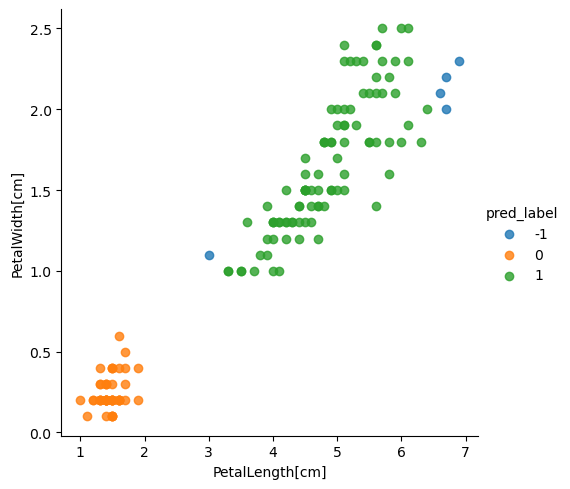

In [7]:
import seaborn as sns

sns.lmplot(x="PetalLength[cm]", y="PetalWidth[cm]", data=val, fit_reg=False, hue="pred_label")

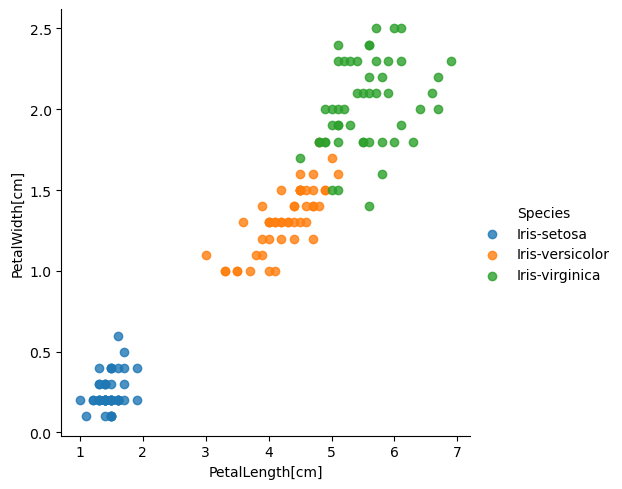

In [8]:
sns.lmplot(x="PetalLength[cm]", y="PetalWidth[cm]", data=df_iris, fit_reg=False, hue="Species")